In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)

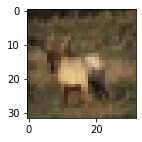

In [7]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[3])

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def plot_sample(X,y,index):
    plt.figure(figsize=(5,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

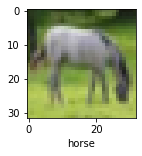

In [9]:
plot_sample(X_train,y_train,87)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

2021-12-11 18:01:06.711137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-11 18:01:06.810676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-11 18:01:06.811453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-11 18:01:06.812618: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
cnn.fit(X_train,y_train,epochs=20)

2021-12-11 18:01:11.077497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2021-12-11 18:01:12.295664: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 11s 3ms/step - loss: 1.4635 - accuracy: 0.4747
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1190 - accuracy: 0.6083
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9894 - accuracy: 0.6547
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9070 - accuracy: 0.6872
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8402 - accuracy: 0.7098
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7912 - accuracy: 0.7261
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7386 - accuracy: 0.7467
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7000 - accuracy: 0.7570
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6617 - accuracy: 0.7729
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6246 - accura

In [14]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2434 - accuracy: 0.6731


[1.2433544397354126, 0.6730999946594238]

In [15]:
y_test = y_test.reshape(-1,)

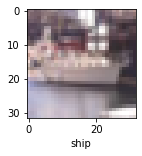

In [16]:
plot_sample(X_test,y_test,191)

In [17]:
y_pred = cnn.predict(X_test)

In [18]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [19]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [20]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1000
           1       0.79      0.80      0.80      1000
           2       0.63      0.51      0.56      1000
           3       0.50      0.48      0.49      1000
           4       0.57      0.65      0.61      1000
           5       0.56      0.61      0.58      1000
           6       0.79      0.69      0.74      1000
           7       0.67      0.73      0.70      1000
           8       0.78      0.78      0.78      1000
           9       0.77      0.74      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



Text(69.0, 0.5, 'Truth')

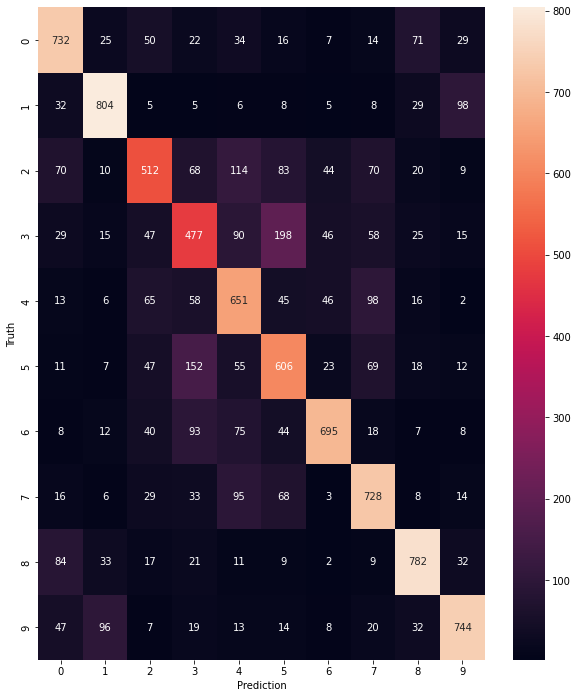

In [21]:
cm = confusion_matrix(y_test,y_classes)
plt.figure(figsize=(10,12))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')